## Study of correlation between number of seeds and the affected area in sandpile model

The aim of this project is to probe the relationship between the number of 'seeds' and the total toppled area in a sandpile model. The model used in the project is a variant of the traditional sandpile model where the grid is initially populated randomly, where each site is assigned a value between zero to four. Thus, some of these sites are at random assigned the value four (which is the critical threshold). We call these sites 'seeds' as these are the sites from which toppling starts.

We wish to find the relationship between the total number of seeds in the starting grid and the total number of sites affected till the grid achieves equillibrium

### Part A: The Model

In [2]:
# Importing the libraries that we will need for the sandpile simulation and visualization

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

cmap = ListedColormap([
    "#2c3e50",  # 0 — dark (empty)
    "#3498db",  # 1 — blue
    "#2ecc71",  # 2 — green
    "#f1c40f",  # 3 — yellow (near critical)
    "#e74c3c"   # 4+ — red (toppling)
])

In [3]:
# Starting parameters

GRID_SIZE = 100
CRITICAL_THRESHOLD = 4

#### Defining Functions

The toppling function is the bulk of the brain of the model. This dictates how sites change when it's value is greater than the critical value

In [4]:
# Defining the toppling function

def avalanche(i, j, array, array_change):

    if array[i, j] > 3:
        array[i, j] = array[i,j] - 4
        array_change[i,j]= 1
        
        if j < GRID_SIZE -1:
            array[i, j+1] += 1
            array_change[i,j+1]= 1
            pass

        if j != 0:
            array[i, j-1] += 1
            array_change[i,j-1]= 1
            pass

        if i != 0:
            array[i-1, j] += 1
            array_change[i-1,j]= 1
            pass

        if i < GRID_SIZE - 1:
            array[i+1, j] +=1
            array_change[i+1,j]= 1
            pass

    return array, array_change

The plotting function is used to visualize the grid

In [5]:
# Defining the plotting function

def plot_a(grid1, grid2, grid3):

    fig, axes = plt.subplots(
    1, 3,
    figsize=(12, 4),
    gridspec_kw={'width_ratios': [1, 1, 0.85]}  # third plot narrower
    )

    im1 = axes[0].imshow(grid1, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[0].set_title("final")
    axes[0].set_aspect('equal')
    axes[0].axis('off')

    im2 = axes[1].imshow(grid2, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[1].set_title("orignal")
    axes[1].set_aspect('equal')
    axes[1].axis('off')

    im3 = axes[2].imshow(grid3, cmap=cmap, origin='lower', vmin=0, vmax=1)
    axes[2].set_title("change")
    axes[2].set_aspect('equal')
    axes[2].axis('off')

    plt.colorbar(im1, ax=axes[0], ticks=[0,1,2,3,4], shrink=0.8)
    plt.colorbar(im2, ax=axes[1], ticks=[0,1,2,3,4], shrink=0.8)
    # plt.colorbar(im3, ax=axes[2], ticks=[0,1,2,3,4], shrink=0.8)

    plt.tight_layout()
    plt.show()

We now define a funciton to populate the initial grid with all zeroes. The function assigns in random a value between 0 to 4 at random to each of the sites in the grid. We have a bias towards the values 2 and 3 to encourage toppling. 
\
\
The function has a parameter x that allows us to control the number of sites with value 4 (which we call seeds). Seeds are the initial sites that topple when we start.
\
\
The function also returns the number of seeds

In [6]:
def populate(x, array):

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            array[i, j] = np.random.choice([0,1,2,3,4], p=[0.2-x,0.2,0.3,0.3,x])
    
    num4 = np.sum(array == 4)
    return num4

#### Example

We now demosnstrate that the code works well and then visualize the results

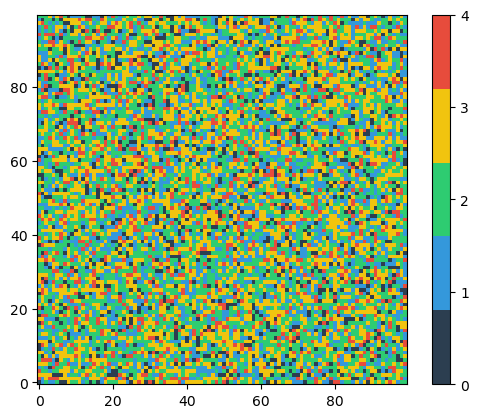

In [7]:
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

populate(0.1, grid)

plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=4)
plt.colorbar(ticks=[0,1,2,3,4])

### Part B: Data Collection

In [119]:
xs = []
num_seeds_list = []
num_iters_list = []
area_list = []

for x in np.linspace(0.0,0.2,1500):

    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    grid_change= grid.copy()
    grid_changeabs = grid.copy()

    num_seeds = populate(x, grid)

    print(f'number of seeds: {num_seeds}')

    n = 0

    while True:
        old_grid = grid.copy()

        for i in range(0, GRID_SIZE):
            for j in range(0, GRID_SIZE):
                avalanche(i,j, grid, grid_change, grid_changeabs)

        n += 1

        if np.array_equal(grid, old_grid):
            break   # nothing changed → stop

    area_affected = np.sum(grid_change == 1)

    xs.append(x)
    num_seeds_list.append(num_seeds)
    num_iters_list.append(n)
    area_list.append(area_affected)

    print(x)

    print(f'number of iterations: {n}')

    print(f'area affected: {area_affected}')

    print("xxxxxxxxx")



number of seeds: 0
0.0
number of iterations: 1
area affected: 0
xxxxxxxxx
number of seeds: 0
0.000133422281521014
number of iterations: 1
area affected: 0
xxxxxxxxx
number of seeds: 2
0.000266844563042028
number of iterations: 2
area affected: 16
xxxxxxxxx
number of seeds: 7
0.00040026684456304204
number of iterations: 10
area affected: 171
xxxxxxxxx
number of seeds: 9
0.000533689126084056
number of iterations: 13
area affected: 191
xxxxxxxxx
number of seeds: 16
0.00066711140760507
number of iterations: 10
area affected: 309
xxxxxxxxx
number of seeds: 8
0.0008005336891260841
number of iterations: 10
area affected: 243
xxxxxxxxx
number of seeds: 8
0.0009339559706470981
number of iterations: 11
area affected: 233
xxxxxxxxx
number of seeds: 16
0.001067378252168112
number of iterations: 6
area affected: 287
xxxxxxxxx
number of seeds: 9
0.001200800533689126
number of iterations: 7
area affected: 128
xxxxxxxxx
number of seeds: 15
0.00133422281521014
number of iterations: 8
area affected: 273

KeyboardInterrupt: 

Text(0, 0.5, 'area affected (%)')

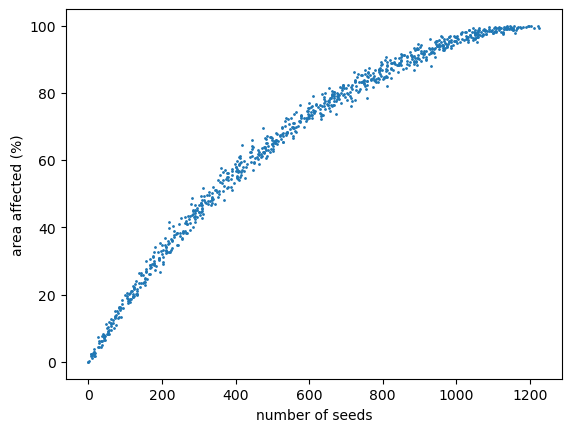

In [129]:
area_percentage = [(area / (GRID_SIZE * GRID_SIZE))*100 for area in area_list]
plt.scatter(num_seeds_list, area_percentage, s=1)
plt.xlabel('number of seeds')
plt.ylabel('area affected (%)')

(1500, 10000)

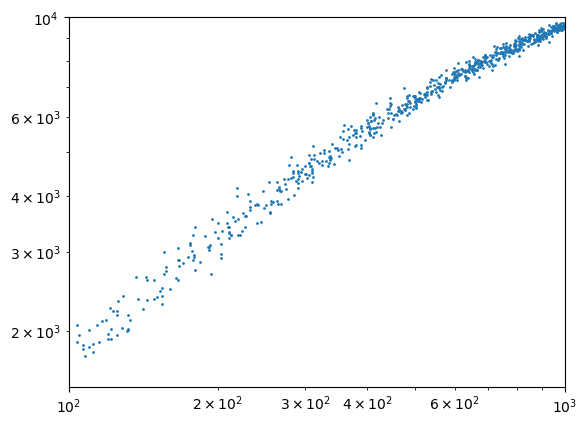

In [128]:
plt.scatter(num_seeds_list, area_list, s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1000)
plt.ylim(1500,10000)

In [124]:
data = np.column_stack((xs, num_seeds_list, num_iters_list, area_list))

np.savetxt(
    "simulation_results_100x100.csv",
    data,
    delimiter=",",
    header="x,num_seeds,iterations,area",
    comments=""
)